Data from https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
filename="WA_Fn-UseC_-Telco-Customer-Churn.csv"
dataset="blastchar/telco-customer-churn"

In [3]:
!kaggle datasets download $dataset -w -o -f $filename 

100%|█████████████████████████████████████████| 955k/955k [00:01<00:00, 674kB/s]
100%|█████████████████████████████████████████| 955k/955k [00:01<00:00, 673kB/s]


In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
len(df)

7043

## Initial data preparation

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [11]:
df.churn = (df.churn == 'yes').astype(int)

In [12]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [15]:
val_size = round(df_test.shape[0]/df_train_full.shape[0],2)
val_size

0.25

In [16]:
df_train, df_val = train_test_split(df_train_full, test_size=val_size, random_state=11)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [19]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## Exploratory data analysis

In [20]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [21]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [22]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [23]:
target = 'churn'
id_col = 'customerid'
num_cols = [cols for cols in df_train_full if df_train_full[cols].dtype != 'object' 
            and cols not in [id_col, target, 'seniorcitizen']]
cat_cols = [cols for cols in df_train_full if cols not in [id_col, target] + num_cols]

In [24]:
df_train_full[cat_cols].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance

In [25]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


In [26]:
female_mean / global_mean

1.0253955354648652

In [27]:
male_mean / global_mean

0.9749802969838747

In [28]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [29]:
partner_yes / global_mean

0.7594724924338315

In [30]:
partner_no / global_mean

1.2216593879412643

In [31]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [32]:
from IPython.display import display

In [33]:
global_mean = df_train_full.churn.mean()
global_mean

0.26996805111821087

In [34]:
for col in cat_cols:
    print(col)
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    df_group['risk_type'] = df_group['risk'].map(lambda risk: 'no_risk' if risk <= 1
                                                 else 'low_risk' if risk > 1 and risk <= 1.1
                                                 else 'medium_risk' if risk > 1.1 and risk <= 1.25
                                                 else 'high_risk')
    display(df_group)

gender


,mean,diff,risk,risk_type
gender,,,,
female,0.276824,0.006856,1.025396,low_risk
male,0.263214,-0.006755,0.974980,no_risk


seniorcitizen


,mean,diff,risk,risk_type
seniorcitizen,,,,
0,0.242270,-0.027698,0.897403,no_risk
1,0.413377,0.143409,1.531208,high_risk


partner


,mean,diff,risk,risk_type
partner,,,,
no,0.329809,0.059841,1.221659,medium_risk
yes,0.205033,-0.064935,0.759472,no_risk


dependents


,mean,diff,risk,risk_type
dependents,,,,
no,0.313760,0.043792,1.162212,medium_risk
yes,0.165666,-0.104302,0.613651,no_risk


phoneservice


,mean,diff,risk,risk_type
phoneservice,,,,
no,0.241316,-0.028652,0.893870,no_risk
yes,0.273049,0.003081,1.011412,low_risk


multiplelines


,mean,diff,risk,risk_type
multiplelines,,,,
no,0.257407,-0.012561,0.953474,no_risk
no_phone_service,0.241316,-0.028652,0.893870,no_risk
yes,0.290742,0.020773,1.076948,low_risk


internetservice


,mean,diff,risk,risk_type
internetservice,,,,
dsl,0.192347,-0.077621,0.712482,no_risk
fiber_optic,0.425171,0.155203,1.574895,high_risk
no,0.077805,-0.192163,0.288201,no_risk


onlinesecurity


,mean,diff,risk,risk_type
onlinesecurity,,,,
no,0.420921,0.150953,1.559152,high_risk
no_internet_service,0.077805,-0.192163,0.288201,no_risk
yes,0.153226,-0.116742,0.567570,no_risk


onlinebackup


,mean,diff,risk,risk_type
onlinebackup,,,,
no,0.404323,0.134355,1.497672,high_risk
no_internet_service,0.077805,-0.192163,0.288201,no_risk
yes,0.217232,-0.052736,0.804660,no_risk


deviceprotection


,mean,diff,risk,risk_type
deviceprotection,,,,
no,0.395875,0.125907,1.466379,high_risk
no_internet_service,0.077805,-0.192163,0.288201,no_risk
yes,0.230412,-0.039556,0.853480,no_risk


techsupport


,mean,diff,risk,risk_type
techsupport,,,,
no,0.418914,0.148946,1.551717,high_risk
no_internet_service,0.077805,-0.192163,0.288201,no_risk
yes,0.159926,-0.110042,0.592390,no_risk


streamingtv


,mean,diff,risk,risk_type
streamingtv,,,,
no,0.342832,0.072864,1.269897,high_risk
no_internet_service,0.077805,-0.192163,0.288201,no_risk
yes,0.302723,0.032755,1.121328,medium_risk


streamingmovies


,mean,diff,risk,risk_type
streamingmovies,,,,
no,0.338906,0.068938,1.255358,high_risk
no_internet_service,0.077805,-0.192163,0.288201,no_risk
yes,0.307273,0.037305,1.138182,medium_risk


contract


,mean,diff,risk,risk_type
contract,,,,
month-to-month,0.431701,0.161733,1.599082,high_risk
one_year,0.120573,-0.149395,0.446621,no_risk
two_year,0.028274,-0.241694,0.104730,no_risk


paperlessbilling


,mean,diff,risk,risk_type
paperlessbilling,,,,
no,0.172071,-0.097897,0.637375,no_risk
yes,0.338151,0.068183,1.252560,high_risk


paymentmethod


,mean,diff,risk,risk_type
paymentmethod,,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928,no_risk
credit_card_(automatic),0.164339,-0.105630,0.608733,no_risk
electronic_check,0.455890,0.185922,1.688682,high_risk
mailed_check,0.193870,-0.076098,0.718121,no_risk


In [35]:
from sklearn.metrics import mutual_info_score

In [36]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[cat_cols].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


In [37]:
df_train_full[num_cols].corrwith(df_train_full.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [38]:
df_train_full.groupby(by='churn')[num_cols].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


## One-hot encoding

In [39]:
from sklearn.feature_extraction import DictVectorizer

In [40]:
train_dict = df_train[cat_cols + num_cols].to_dict(orient='records')
val_dict = df_val[cat_cols + num_cols].to_dict(orient='records')
test_dict = df_test[cat_cols + num_cols].to_dict(orient='records')

In [43]:
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 58,
 'monthlycharges': 105.2,
 'totalcharges': 6225.4}

In [44]:
dv = DictVectorizer(sparse=False)
train_data_matrix = dv.fit_transform(train_dict)
X_train = pd.DataFrame(data=train_data_matrix, columns=dv.feature_names_)
X_val = pd.DataFrame(data=dv.transform(val_dict), columns=dv.feature_names_)
X_test = pd.DataFrame(data=dv.transform(test_dict), columns=dv.feature_names_)

In [45]:
X_train

,contract=month-to-month,contract=one_year,contract=two_year,dependents=no,dependents=yes,deviceprotection=no,deviceprotection=no_internet_service,deviceprotection=yes,gender=female,gender=male,internetservice=dsl,internetservice=fiber_optic,internetservice=no,monthlycharges,multiplelines=no,multiplelines=no_phone_service,multiplelines=yes,onlinebackup=no,onlinebackup=no_internet_service,onlinebackup=yes,onlinesecurity=no,onlinesecurity=no_internet_service,onlinesecurity=yes,paperlessbilling=no,paperlessbilling=yes,partner=no,partner=yes,paymentmethod=bank_transfer_(automatic),paymentmethod=credit_card_(automatic),paymentmethod=electronic_check,paymentmethod=mailed_check,phoneservice=no,phoneservice=yes,seniorcitizen,streamingmovies=no,streamingmovies=no_internet_service,streamingmovies=yes,streamingtv=no,streamingtv=no_internet_service,streamingtv=yes,techsupport=no,techsupport=no_internet_service,techsupport=yes,tenure,totalcharges
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,105.20,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,58.0,6225.40
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84.95,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,16.0,1378.25
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,19.45,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,71.0,1378.45
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,69.05,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,318.50
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,85.30,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,47.0,4045.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,110.10,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,63.0,6705.70
4221,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,70.65,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,142.35
4222,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,19.30,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,28.30
4223,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,20.30,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,23.0,470.60


In [46]:
def sigmoid(score):
    """Push score between -1 and 1"""
    
    return 1/(1+np.exp(-score))

In [47]:
values = np.linspace(-50, 50, 60)

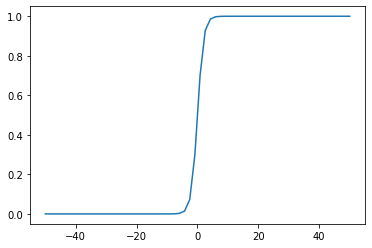

In [48]:
#Pass values through sigmoid and lets plot them
plt.plot(values, sigmoid(values))

In [49]:
def logistic_regression_model(X,y):
    
    XTX = X.T.dot(X) 
    XTX_inv = np.linalg.inv(XTX)
    weights = y.dot(X).dot(XTX_inv)
    
    return weights

def logistic_regression_predict(weights, X):
    
    return sigmoid(weights.dot(X.T))

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
model_weights = logistic_regression_model(train_data_matrix, y_train)
train_preds = logistic_regression_predict(model_weights, train_data_matrix)

accuracy_score(y_train, (train_preds >= 0.5).astype(int))

/var/folders/6f/p7312_7n4nq5hp35rfymms1h0000gn/T/ipykernel_8484/410001219.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-score))


0.49846153846153846

## Logistic Regression with Scikit Learn

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

y_train_prob = model.predict_proba(X_train)
y_val_prob = model.predict_proba(X_val)
y_test_prob = model.predict_proba(X_test)


y_train_churn = (y_train_prob[:,1] >= 0.5).astype(int)
y_val_churn = (y_val_prob[:,1] >= 0.5).astype(int)
y_test_churn = (y_test_prob[:,1] >= 0.5).astype(int)

/Users/bajajn/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# Model coefficients and weights

model_weights = model.coef_.round(3)
model_intercept = model.intercept_

In [55]:
#Check distributions of scores
y_test.mean(), y_test_pred.mean(), y_test_churn.mean()

(0.24698367636621718, 0.23491838183108588, 0.23491838183108588)

In [56]:
# Check accuracy score test
accuracy_score(y_test, y_test_pred)

0.8090844570617459

In [57]:
# Check accuracy score val
accuracy_score(y_val, y_val_pred)

0.8019872249822569

In [58]:
#Lets train the entire training dataset
X_train_full = df_train_full[num_cols + cat_cols].to_dict(orient='records')
y_train_full = df_train_full.churn.values

dv = DictVectorizer(sparse=False)
X_train_matrix = dv.fit_transform(X_train_full)
X_test_matrix = dv.transform(test_dict)

In [59]:
#Train model
model = LogisticRegression(random_state=1)
model.fit(X_train_matrix, y_train_full)

print(f"Training accuracy is {accuracy_score(y_train_full, model.predict(X_train_matrix))}")

Training accuracy is 0.8033368832090877


In [61]:
#Test accuracy improved after data is trained on full dataset
y_test_pred = model.predict(X_test_matrix)
y_test_prob = model.predict_proba(X_test_matrix)

y_test_churn = (y_test_prob[:,1] >= 0.5).astype(int)

print(accuracy_score(y_test, y_test_pred))

0.815471965933286


In [62]:
#Lets use the model to find who is likely to churn

def get_prediction_for_churn(data):
    df = data.copy()
    records = df[num_cols+cat_cols].to_dict(orient='records')
    records_matrix = dv.transform(records)
    predictions = model.predict(records_matrix)
    pred_probs = model.predict_proba(records_matrix)[:,1]
    
    churn = pred_probs >= 0.5
    return (churn).astype('int')
    

In [63]:
# Find all the customers to whom promotion will be sent
df_test['churn'] = get_prediction_for_churn(df_test)
df_test['promotion'] = df_test['churn'].apply(lambda churn: 'yes' if churn == 1 else 'no')

In [64]:
df_test

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,promotion
0,8879-zkjof,female,0,no,no,41,yes,no,dsl,yes,no,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),79.85,3320.75,0,no
1,0201-mibol,female,1,no,no,66,yes,yes,fiber_optic,yes,no,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),102.40,6471.85,0,no
2,1600-dilpe,female,0,no,no,12,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,bank_transfer_(automatic),45.00,524.35,0,no
3,8601-qacrs,female,0,no,no,5,yes,yes,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,50.60,249.95,1,yes
4,7919-zodzz,female,0,yes,yes,10,yes,no,dsl,no,yes,yes,no,no,yes,one_year,yes,mailed_check,65.90,660.05,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5130-iekqt,male,1,no,no,25,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,no,mailed_check,105.95,2655.25,0,no
1405,4452-rohmo,female,0,no,no,15,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.60,331.60,0,no
1406,6164-haqtx,male,0,no,no,71,no,no_phone_service,dsl,yes,yes,yes,yes,yes,no,two_year,no,bank_transfer_(automatic),53.95,3888.65,0,no
1407,3982-dqlus,male,1,yes,yes,65,yes,yes,fiber_optic,yes,yes,no,no,no,no,month-to-month,yes,electronic_check,85.75,5688.45,0,no


In [65]:
#Lets get weight of all the variables
dict(zip(dv.feature_names_, model.coef_[0].round(3)))

{'contract=month-to-month': 0.268,
 'contract=one_year': -0.153,
 'contract=two_year': -0.238,
 'dependents=no': 0.029,
 'dependents=yes': -0.153,
 'deviceprotection=no': 0.066,
 'deviceprotection=no_internet_service': -0.092,
 'deviceprotection=yes': -0.098,
 'gender=female': -0.052,
 'gender=male': -0.071,
 'internetservice=dsl': -0.298,
 'internetservice=fiber_optic': 0.266,
 'internetservice=no': -0.092,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.221,
 'multiplelines=no_phone_service': 0.032,
 'multiplelines=yes': 0.066,
 'onlinebackup=no': 0.089,
 'onlinebackup=no_internet_service': -0.092,
 'onlinebackup=yes': -0.121,
 'onlinesecurity=no': 0.232,
 'onlinesecurity=no_internet_service': -0.092,
 'onlinesecurity=yes': -0.263,
 'paperlessbilling=no': -0.269,
 'paperlessbilling=yes': 0.145,
 'partner=no': -0.067,
 'partner=yes': -0.056,
 'paymentmethod=bank_transfer_(automatic)': -0.086,
 'paymentmethod=credit_card_(automatic)': -0.105,
 'paymentmethod=electronic_check': 0.261,